In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/train.csv')
df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate


In [4]:
df.describe()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
count,36765,36765,36765,36765,36765
unique,36765,4191,36691,7,3
top,5af65f524803,900A879708F0,Summer projects should be student-designed,Evidence,Adequate
freq,1,23,14,12105,20977


In [5]:
drop_indices = df[df['discourse_text'].duplicated(keep=False)].index

In [6]:
df.drop(drop_indices, inplace=True)

df.describe()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
count,36646,36646,36646,36646,36646
unique,36646,4191,36646,7,3
top,5af65f524803,91B1F82B2CF1,There are many ways you could motivate people ...,Evidence,Adequate
freq,1,23,1,12103,20878


<BarContainer object of 3 artists>

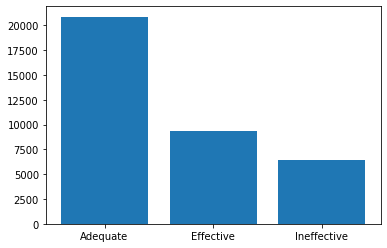

In [7]:
plt.bar(df.discourse_effectiveness.value_counts().keys(), df.discourse_effectiveness.value_counts().values)

<BarContainer object of 7 artists>

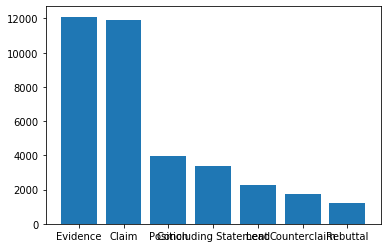

In [8]:
plt.bar(df.discourse_type.value_counts().keys(), df.discourse_type.value_counts().values)

In [9]:
gk = df.groupby(['discourse_type', 'discourse_effectiveness'])['discourse_effectiveness'].count()
gk

#TO DO: plot

discourse_type        discourse_effectiveness
Claim                 Adequate                   7068
                      Effective                  3401
                      Ineffective                1469
Concluding Statement  Adequate                   1944
                      Effective                   825
                      Ineffective                 581
Counterclaim          Adequate                   1146
                      Effective                   418
                      Ineffective                 204
Evidence              Adequate                   6062
                      Effective                  2885
                      Ineffective                3156
Lead                  Adequate                   1240
                      Effective                   683
                      Ineffective                 363
Position              Adequate                   2725
                      Effective                   766
                      Ineffective   

In [10]:
temp = df.groupby(["essay_id"]).discourse_type.value_counts().to_frame()
temp.columns = ['amount']
temp.reset_index(drop = False, inplace=True)
temp = temp.pivot(index="essay_id", columns = "discourse_type").amount
temp

discourse_type,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal
essay_id,,,,,,,
00066EA9880D,3.0,1.0,NaN,3.0,1.0,1.0,NaN
000E6DE9E817,5.0,1.0,1.0,3.0,NaN,1.0,1.0
0016926B079C,7.0,NaN,NaN,3.0,NaN,1.0,NaN
00203C45FC55,1.0,1.0,3.0,3.0,1.0,1.0,3.0
0029F4D19C3F,2.0,1.0,1.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
FFA381E58FC6,2.0,1.0,NaN,1.0,NaN,1.0,NaN
FFC43F453EF6,4.0,1.0,3.0,1.0,NaN,1.0,1.0
FFD97A99CEBA,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [11]:
temp.mean()

discourse_type
Claim                   3.162384
Concluding Statement    1.005704
Counterclaim            1.311573
Evidence                2.904488
Lead                    1.000876
Position                1.004825
Rebuttal                1.223206
dtype: float64

In [12]:
import string 

def clean(text):
    return text.lower().translate(str.maketrans('', '', string.punctuation)).strip()

df['discourse_text_no_punct'] = df['discourse_text'].apply(lambda x: clean(x))
df['discourse_num_words'] = df['discourse_text_no_punct'].apply(lambda x: len(x.split()))
df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,discourse_text_no_punct,discourse_num_words
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,hi im isaac im going to be writing about how t...,67
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,on my perspective i think that the face is a n...,41
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,i think that the face is a natural landform be...,21
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,if life was on mars we would know by now the r...,72
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,people thought that the face was formed by ali...,18


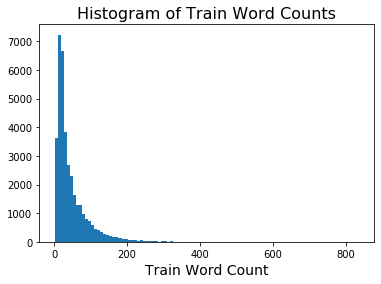

In [13]:
plt.hist(df["discourse_num_words"], bins=100)
plt.title('Histogram of Train Word Counts',size=16)
plt.xlabel('Train Word Count',size=14)
plt.show()

In [14]:
df.to_csv('./data/train_clean.csv', encoding='utf-8', index=False)